# Import libraries

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from utils import *

# Parameters

In [2]:
fig_dir = 'data/figure'
exp_name = 'compare_number_of_poi'
time_path = 'data/time/compare_number_of_poi_2020_12_11_12_20_46.npy'
cost_path = 'data/cost/compare_number_of_poi_2020_12_11_12_20_46.npy'
methods = ['greedy', 'approx', 'approx_woc']
sizes = np.arange(10, 101, step=10)
repeats = len(sizes)

# Load data

In [3]:
%%time
run_time = np.load(time_path)
travel_cost = np.load(cost_path)
print(run_time.shape, travel_cost.shape)

(30,) (30,)
Wall time: 6.99 ms


# Convert to DataFrame

In [4]:
df_time = pd.DataFrame(run_time.reshape(repeats,-1)/np.power(10,6), columns=methods)
df_time.loc[:, 'size'] = sizes
print(df_time.shape)
print(df_time.info())
display(df_time)

(10, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   greedy      10 non-null     float64
 1   approx      10 non-null     float64
 2   approx_woc  10 non-null     float64
 3   size        10 non-null     int32  
dtypes: float64(3), int32(1)
memory usage: 408.0 bytes
None


,greedy,approx,approx_woc,size
0,0.000000,0.592323,0.155682,10
1,0.000000,0.464060,0.046774,20
2,0.000000,0.483553,0.025634,30
3,0.000000,0.460869,0.023738,40
4,0.000000,0.497567,0.016658,50
5,0.000197,0.471036,0.016254,60
6,0.000000,0.455586,0.010171,70
7,0.000100,0.552422,0.013265,80
8,0.000000,0.491686,0.009676,90
9,0.000000,0.492682,0.009973,100


In [5]:
df_cost =  pd.DataFrame(travel_cost.reshape(repeats,-1), columns=methods)
df_cost.loc[:, 'size'] = sizes
print(df_cost.shape)
print(df_cost.info())
display(df_cost)

(10, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   greedy      10 non-null     float64
 1   approx      10 non-null     float64
 2   approx_woc  10 non-null     float64
 3   size        10 non-null     int32  
dtypes: float64(3), int32(1)
memory usage: 408.0 bytes
None


,greedy,approx,approx_woc,size
0,15312.9,11153.7,11708.6,10
1,10990.9,9282.7,9781.1,20
2,8443.9,7645.8,7932.4,30
3,8329.1,7547.0,7916.8,40
4,6965.2,6483.1,6688.7,50
5,6227.1,5654.7,5786.5,60
6,5668.7,5270.4,5505.8,70
7,5424.3,5104.3,5174.5,80
8,4530.3,4306.2,4361.5,90
9,4815.5,4459.0,4629.5,100


# Calculate metrics 

## Processing time

In [6]:
df_time.mean()

greedy         0.000030
approx         0.496178
approx_woc     0.032783
size          55.000000
dtype: float64

## Ride-sharing efficiency

In [7]:
df_cost.loc[:, 'approx_gain'] = df_cost['greedy']/df_cost['approx']
df_cost.loc[:, 'approx_woc_gain'] = df_cost['greedy']/df_cost['approx_woc']
display(df_cost)

,greedy,approx,approx_woc,size,approx_gain,approx_woc_gain
0,15312.9,11153.7,11708.6,10,1.372899,1.307834
1,10990.9,9282.7,9781.1,20,1.184020,1.123688
2,8443.9,7645.8,7932.4,30,1.104384,1.064482
3,8329.1,7547.0,7916.8,40,1.103631,1.052079
4,6965.2,6483.1,6688.7,50,1.074363,1.041338
5,6227.1,5654.7,5786.5,60,1.101226,1.076143
6,5668.7,5270.4,5505.8,70,1.075573,1.029587
7,5424.3,5104.3,5174.5,80,1.062692,1.048275
8,4530.3,4306.2,4361.5,90,1.052041,1.038702
9,4815.5,4459.0,4629.5,100,1.079951,1.040177


In [8]:
df_cost[['approx_gain', 'approx_woc_gain']].mean()

approx_gain        1.121078
approx_woc_gain    1.082231
dtype: float64

In [9]:
df_cost[['greedy', 'approx', 'approx_woc']].mean()

greedy        7670.79
approx        6690.69
approx_woc    6948.54
dtype: float64

# Plots

## Processing time

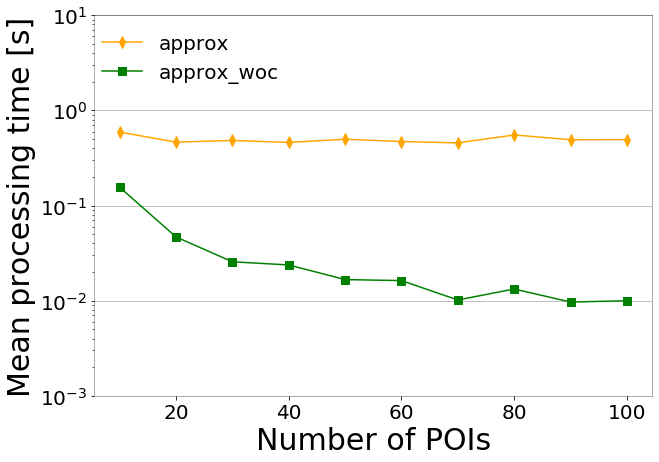

In [14]:
plot_proc_time(
    df_time, 
    sizes, 
    exp_name, 
    ylim=(10**-3, 10**1), 
    xlabel='Number of POIs',
    legend_loc=(0, 0.8)
)

## Travel cost

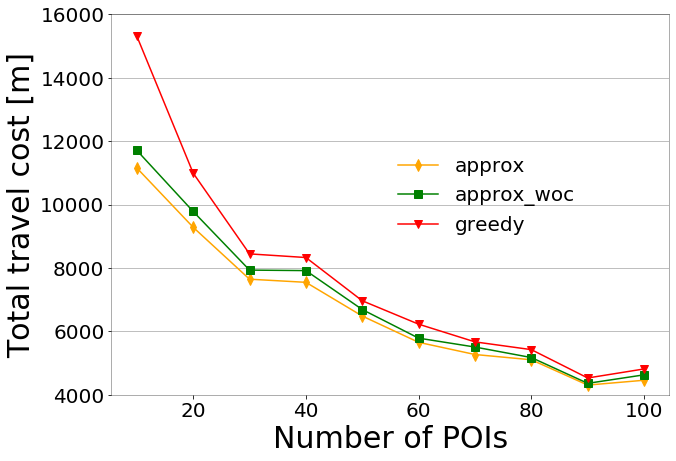

In [15]:
plot_travel_cost(
    df_cost, 
    sizes, 
    exp_name, 
    ylim=(4000,16000), 
    xlabel='Number of POIs',
    legend_loc=(0.5, 0.4)
)

## Ride-sharing efficiency

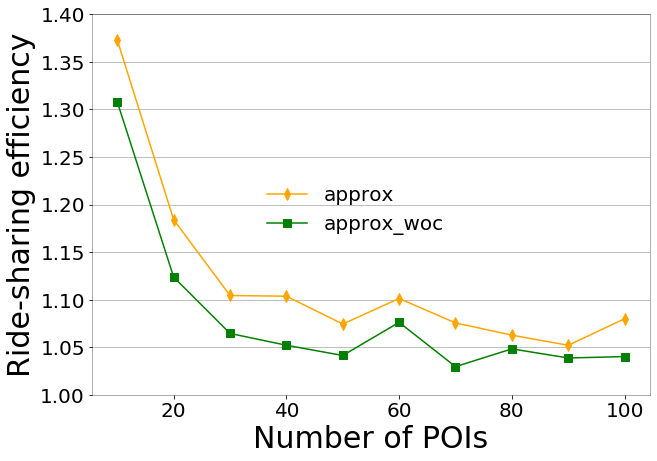

In [12]:
plot_rs_efficiency(
    df_cost, 
    sizes, 
    exp_name, 
    ylim=(1.,1.4), 
    xlabel='Number of POIs',
    legend_loc=(0.3, 0.4)
)